In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import itertools

In [2]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    #plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.xlabel('Predicted label')
    plt.show()

In [3]:
def print_metrices(pred,true):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ",accuracy_score(pred,true))
    print("Precison : ",precision_score(pred,true, average = 'weighted'))
    print("Recall : ",recall_score(pred,true,  average = 'weighted'))
    print("F1 : ",f1_score(pred,true,  average = 'weighted'))

In [4]:
train_df = pd.read_csv('../Datasets/COVID-19-data/Constraint_Train.csv')
test_df = pd.read_csv('../Datasets/COVID-19-data/Constraint_Val.csv')

In [5]:
train_df.head(5)

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


In [6]:
test_df.head(5)

,id,tweet,label
0,1,Chinese converting to Islam after realising th...,fake
1,2,11 out of 13 people (from the Diamond Princess...,fake
2,3,"COVID-19 Is Caused By A Bacterium, Not Virus A...",fake
3,4,Mike Pence in RNC speech praises Donald Trump’...,fake
4,5,6/10 Sky's @EdConwaySky explains the latest #C...,real


In [7]:
X_train = train_df['tweet']
Y_train = train_df['label']
X_test = test_df['tweet']
Y_test = test_df['label']

# Naive Bayes

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [9]:
tc_model_bayes = Pipeline([('tfidf', TfidfVectorizer()), ('bayes', MultinomialNB())]).fit(X_train, Y_train)

[[ 869  151]
 [  43 1077]]
              precision    recall  f1-score   support

        fake       0.95      0.85      0.90      1020
        real       0.88      0.96      0.92      1120

    accuracy                           0.91      2140
   macro avg       0.91      0.91      0.91      2140
weighted avg       0.91      0.91      0.91      2140

Accuracy :  0.9093457943925234
Precison :  0.9148793489358361
Recall :  0.9093457943925234
F1 :  0.9097947153002264


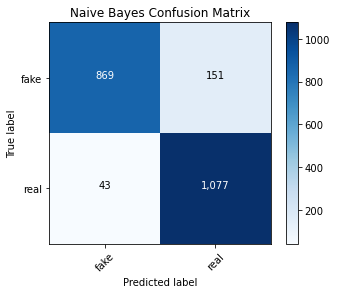

In [10]:
predicted_bayes = tc_model_bayes.predict(X_test)
print_metrices(predicted_bayes,Y_test)
plot_confusion_matrix(confusion_matrix(Y_test,predicted_bayes),target_names=['fake','real'], normalize = False, \
                      title = 'Naive Bayes Confusion Matrix')

# SVM

In [11]:
from sklearn.linear_model import SGDClassifier
tc_model_svm = Pipeline([('tfidf', TfidfVectorizer()), ('svm', SGDClassifier(loss='hinge', alpha=1e-3, penalty='l2',random_state=42))]).fit(X_train, Y_train)

[[ 928   92]
 [  69 1051]]
              precision    recall  f1-score   support

        fake       0.93      0.91      0.92      1020
        real       0.92      0.94      0.93      1120

    accuracy                           0.92      2140
   macro avg       0.93      0.92      0.92      2140
weighted avg       0.92      0.92      0.92      2140

Accuracy :  0.9247663551401869
Precison :  0.9250736194010314
Recall :  0.9247663551401869
F1 :  0.9248129839787331


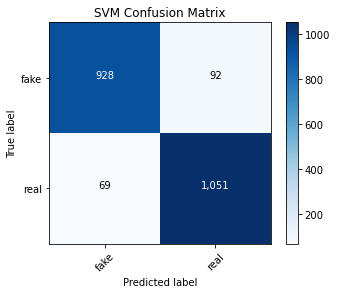

In [12]:
predicted_svm = tc_model_svm.predict(X_test)
print_metrices(predicted_svm,Y_test)
plot_confusion_matrix(confusion_matrix(Y_test,predicted_svm),target_names=['fake','real'], normalize = False, \
                      title = 'SVM Confusion Matrix')

# Decision Tree

In [13]:
from sklearn import tree

In [14]:
tc_model_dt = Pipeline([('tfidf', TfidfVectorizer()), ('decision tree', tree.DecisionTreeClassifier())]).fit(X_train, Y_train)

[[878 142]
 [124 996]]
              precision    recall  f1-score   support

        fake       0.88      0.86      0.87      1020
        real       0.88      0.89      0.88      1120

    accuracy                           0.88      2140
   macro avg       0.88      0.88      0.88      2140
weighted avg       0.88      0.88      0.88      2140

Accuracy :  0.8757009345794392
Precison :  0.8759406659860205
Recall :  0.8757009345794392
F1 :  0.8757587597985204


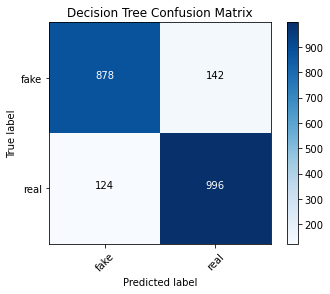

In [15]:
predicted_dt = tc_model_dt.predict(X_test)
print_metrices(predicted_dt,Y_test)
plot_confusion_matrix(confusion_matrix(Y_test,predicted_dt),target_names=['fake','real'], normalize = False, \
                      title = 'Decision Tree Confusion Matrix')

# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
tc_model_lr = Pipeline([('tfidf', TfidfVectorizer()), ('logistic regression', LogisticRegression())]).fit(X_train, Y_train)

[[ 925   95]
 [  62 1058]]
              precision    recall  f1-score   support

        fake       0.94      0.91      0.92      1020
        real       0.92      0.94      0.93      1120

    accuracy                           0.93      2140
   macro avg       0.93      0.93      0.93      2140
weighted avg       0.93      0.93      0.93      2140

Accuracy :  0.9266355140186916
Precison :  0.9272181045315322
Recall :  0.9266355140186916
F1 :  0.9267060977562901


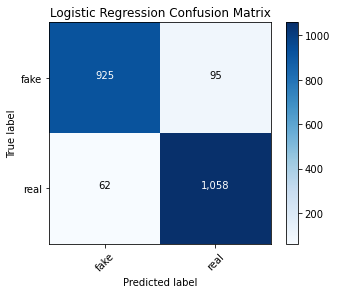

In [18]:
predicted_lr = tc_model_lr.predict(X_test)
print_metrices(predicted_lr,Y_test)
plot_confusion_matrix(confusion_matrix(Y_test,predicted_lr),target_names=['fake','real'], normalize = False, \
                      title = 'Logistic Regression Confusion Matrix')

# Linear SVC

In [19]:
from sklearn.svm import LinearSVC

In [20]:
tc_model_svc = Pipeline([('tfidf', TfidfVectorizer()), ('svc', LinearSVC())]).fit(X_train, Y_train)

[[ 936   84]
 [  48 1072]]
              precision    recall  f1-score   support

        fake       0.95      0.92      0.93      1020
        real       0.93      0.96      0.94      1120

    accuracy                           0.94      2140
   macro avg       0.94      0.94      0.94      2140
weighted avg       0.94      0.94      0.94      2140

Accuracy :  0.9383177570093458
Precison :  0.9389821723081755
Recall :  0.9383177570093458
F1 :  0.9383839682296299


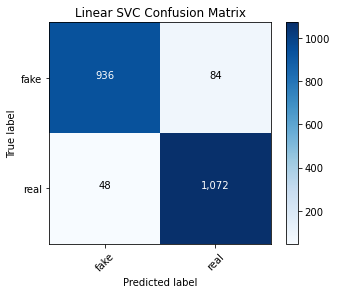

In [21]:
predicted_svc = tc_model_svc.predict(X_test)
print_metrices(predicted_svc,Y_test)
plot_confusion_matrix(confusion_matrix(Y_test,predicted_svc),target_names=['fake','real'], normalize = False, \
                      title = 'Linear SVC Confusion Matrix')

# Gradient Boosting Classifier

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

In [23]:
tc_model_gbc = Pipeline([('tfidf', TfidfVectorizer()), ('gradient boosting classifier', GradientBoostingClassifier())]).fit(X_train, Y_train)

[[ 888  132]
 [  93 1027]]
              precision    recall  f1-score   support

        fake       0.91      0.87      0.89      1020
        real       0.89      0.92      0.90      1120

    accuracy                           0.89      2140
   macro avg       0.90      0.89      0.89      2140
weighted avg       0.90      0.89      0.89      2140

Accuracy :  0.8948598130841121
Precison :  0.8957049840964424
Recall :  0.8948598130841121
F1 :  0.8949847977513378


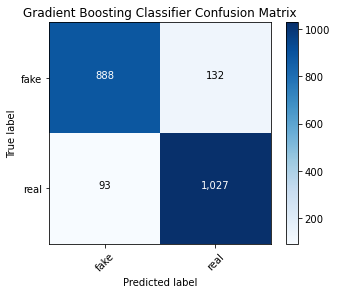

In [24]:
predicted_gbc = tc_model_gbc.predict(X_test)
print_metrices(predicted_gbc,Y_test)
plot_confusion_matrix(confusion_matrix(Y_test,predicted_gbc),target_names=['fake','real'], normalize = False, \
                      title = 'Gradient Boosting Classifier Confusion Matrix')

In [25]:
unlabelled_df = pd.read_csv('../Datasets/COVID-19-data/Constraint_Test.csv')

In [26]:
unlabelled_df.head(5)

,id,tweet
0,1,Our daily update is published. States reported...
1,2,Alfalfa is the only cure for COVID-19.
2,3,President Trump Asked What He Would Do If He W...
3,4,States reported 630 deaths. We are still seein...
4,5,This is the sixth time a global health emergen...


In [27]:
unlabelled_df['bayes_label'] = tc_model_bayes.predict(unlabelled_df['tweet'])
unlabelled_df['svm_label'] = tc_model_svm.predict(unlabelled_df['tweet'])
unlabelled_df['dt_label'] = tc_model_dt.predict(unlabelled_df['tweet'])
unlabelled_df['lr_label'] = tc_model_lr.predict(unlabelled_df['tweet'])
unlabelled_df['svc_label'] = tc_model_svc.predict(unlabelled_df['tweet'])
unlabelled_df['gbc_label'] = tc_model_gbc.predict(unlabelled_df['tweet'])
unlabelled_df.head(10)

,id,tweet,bayes_label,svm_label,dt_label,lr_label,svc_label,gbc_label
0,1,Our daily update is published. States reported...,real,real,real,real,real,real
1,2,Alfalfa is the only cure for COVID-19.,fake,fake,fake,fake,fake,fake
2,3,President Trump Asked What He Would Do If He W...,fake,fake,real,fake,fake,fake
3,4,States reported 630 deaths. We are still seein...,real,real,real,real,real,real
4,5,This is the sixth time a global health emergen...,real,real,real,real,real,real
5,6,Low #vitaminD was an independent predictor of ...,real,real,fake,real,real,real
6,7,A common question: why are the cumulative outc...,real,real,real,real,real,real
7,8,The government should consider bringing in any...,real,fake,fake,fake,real,real
8,9,Our daily update is published. We’ve now track...,real,real,real,real,real,real
9,10,Breakdown of testing: 4 air crew 97 hotel &amp...,real,real,real,real,real,fake
